#  Import Packages

In [45]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [46]:
clean_df, data = read_data('../../datasets/yt_subscribers.csv', debug=True)

         Date  Subscribers  Unnamed: 2  Unnamed: 3  Unnamed: 4
0   8/26/2024           40         NaN         NaN         NaN
1  10/13/2024           39         NaN         NaN         NaN
2   3/28/2024           38         NaN         NaN         NaN
3   8/25/2024           38         NaN         NaN         NaN
4   7/18/2024           37         NaN         NaN         NaN
5   9/16/2024           36         NaN         NaN         NaN
6   8/10/2024           34         NaN         NaN         NaN
7   7/26/2024           33         NaN         NaN         NaN
8    9/1/2024           33         NaN         NaN         NaN
9   11/4/2024           33         NaN         NaN         NaN
----------------------------------------------------
          Date  Subscribers
254 2023-11-15           13
336 2023-11-16            8
349 2023-11-17            6
301 2023-11-18           10
215 2023-11-19           15
180 2023-11-20           17
361 2023-11-21            3
337 2023-11-22            8
35

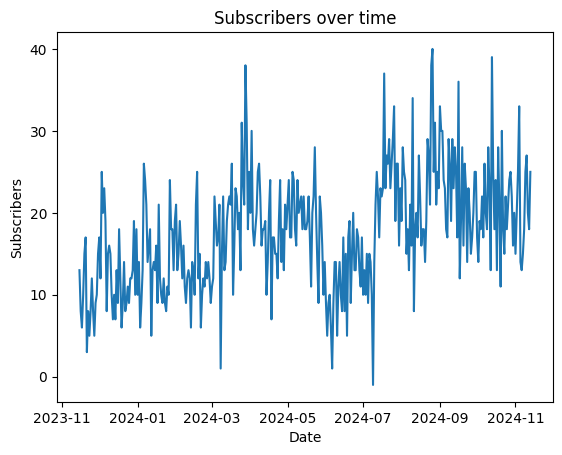

In [47]:
plot_data(clean_df["Subscribers"], title="Subscribers over time", x_label="Date", y_label="Subscribers")

In [48]:
def prepare_train_test_data(data, time_step_in, time_step_out, test_size=0.2):
    X, Y = create_dataset(data, time_step_in, time_step_out)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

    # Separate scalers for X and Y
    scaler_X = MinMaxScaler(feature_range=(0,1))
    scaler_Y = MinMaxScaler(feature_range=(0,1))
    x_train = scaler_X.fit_transform(X_train)
    y_train = scaler_Y.fit_transform(Y_train)
    x_test = scaler_X.transform(X_test)
    y_test = scaler_Y.transform(Y_test)

    print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
    
    return x_train, x_test, y_train, y_test, scaler_X, scaler_Y
x_train, x_test, y_train, y_test, scaler_X, scaler_Y = prepare_train_test_data(data, time_step_in=60, time_step_out=30, test_size=0.2)

x_train shape: (220, 60), y_train shape: (220, 30), x_test shape: (55, 60), y_test shape: (55, 30)


In [49]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(f"X_test shape => {x_test.shape}\nX_train shape => {x_train.shape}")

X_test shape => (55, 60, 1)
X_train shape => (220, 60, 1)


In [50]:
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
lstm_model.add(LSTM(50,return_sequences=True))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(30))
lstm_model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.03), metrics=['mean_absolute_error'])
lstm_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         1,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,330 (204.41 KB)

 Trainable params: 52,330 (204.41 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history=lstm_model.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=1,
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - loss: 0.4012 - mean_absolute_error: 0.4012 - val_loss: 0.2165 - val_mean_absolute_error: 0.2165
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - val_loss: 0.1480 - val_mean_absolute_error: 0.1480
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - val_loss: 0.1417 - val_mean_absolute_error: 0.1417
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - val_loss: 0.1394 - val_mean_absolute_error: 0.1394
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - val_loss: 0.1401 - val_mean_absolute_error: 0.1401
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - val_loss: 0.1371 - val_mean_absolute_error: 0.1371
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - val_loss: 0.13

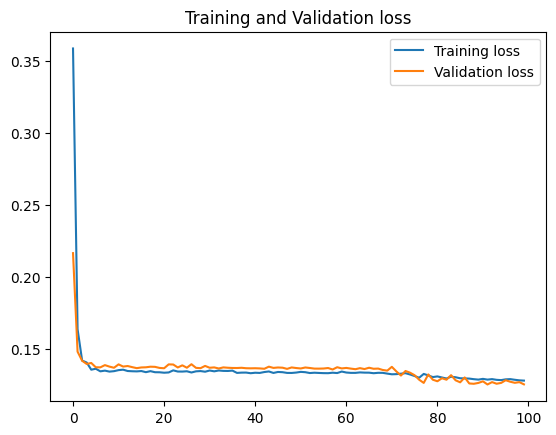

In [52]:
history_plot(history)

In [53]:
train_predicted=lstm_model.predict(x_train)
test_predicted=lstm_model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [54]:
mae_error_train= mae(y_train,train_predicted)
mae_error_test= mae(y_test,test_predicted)
print(f"MAE Train data  : {mae_error_train} ")
print(f"MAE  Test data : {mae_error_test} ")

MAE Train data  : 0.1271140678382538 
MAE  Test data : 0.12524145983223087 


In [55]:
# first sample from x_test and reshape it to (1, time_steps, features)
y_next_30 = lstm_model.predict(x_test[0].reshape(1, x_test.shape[1], x_test.shape[2]))
y_next_30=scaler_Y.inverse_transform(y_next_30) 
y_next_30=np.round(y_next_30)
print(y_next_30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[17. 16. 16. 17. 16. 17. 17. 17. 17. 17. 17. 18. 18. 17. 18. 18. 18. 18.
  18. 18. 19. 19. 19. 18. 18. 18. 18. 19. 19. 18.]]


In [56]:
x_train= x_train.reshape(x_train.shape[0], -1)
x_test= x_test.reshape(x_test.shape[0], -1)
print(f"X_test shape => {x_test.shape}\nX_train shape => {x_train.shape}")

X_test shape => (55, 60)
X_train shape => (220, 60)


In [57]:
x_test=scaler_X.inverse_transform(x_test)
x_train=scaler_X.inverse_transform(x_train)

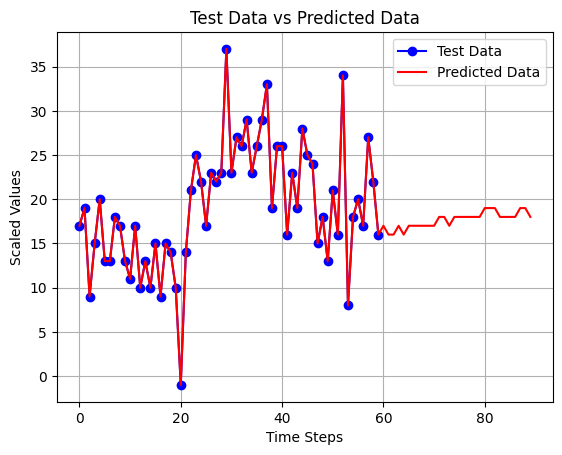

In [58]:
plt.plot(x_test[-1], label='Test Data', color='blue', marker='o')
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red')
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
last_date = clean_df.index[-1]
total_sub=np.sum(clean_df["Subscribers"])
total_next_30=np.sum(y_next_30)
print(f"Total subscribers till {last_date}: {total_sub}, next_30_days: {total_next_30} => final after 30 days: {total_sub + total_next_30}")

Total subscribers till 2024-11-13 00:00:00: 6383, next_30_days: 530.0 => final after 30 days: 6913.0
